In [1]:
import tensorflow.keras as keras
import tensorflow as tf


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

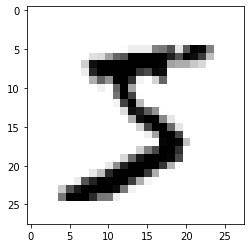

5


In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

print(y_train[0])

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

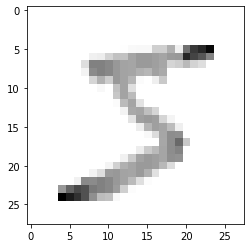

In [8]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2618 - acc: 0.9239
Epoch 2/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1104 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0739 - acc: 0.9769


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0929 - acc: 0.9721
0.09293580320309848
0.9721


In [0]:
model.save('epic_num_reader.model')

In [13]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
predictions = new_model.predict(x_test)

In [15]:
print(predictions)

[[1.1174992e-07 6.2460543e-07 4.6569462e-06 ... 9.9989653e-01
  2.6028554e-08 3.0430290e-06]
 [6.6162165e-10 1.2325743e-04 9.9981934e-01 ... 1.0284680e-09
  1.3429014e-08 2.1653620e-11]
 [1.5991600e-06 9.9943274e-01 1.6457294e-05 ... 1.0683927e-04
  2.6460682e-04 1.7254597e-05]
 ...
 [1.5683632e-07 9.3927764e-07 1.8756695e-07 ... 3.3972022e-04
  9.6886799e-07 1.5155842e-04]
 [3.9228353e-06 2.2915947e-07 6.8443091e-09 ... 1.1798639e-07
  3.1286487e-04 1.7512301e-07]
 [2.4458116e-06 2.4552879e-08 4.5494755e-08 ... 1.1835430e-10
  2.1405897e-07 1.8038770e-08]]


In [17]:
import numpy as np

print(np.argmax(predictions[0]))

7


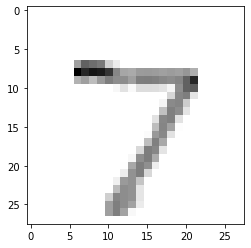

In [18]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()